In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [220]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [221]:
%cd /content/drive/MyDrive/Colab Notebooks/2023_Data_Mining_Physics_vs_Chemistry_vs_Biology_Dataset/klasifikacija

/content/drive/MyDrive/Colab Notebooks/2023_Data_Mining_Physics_vs_Chemistry_vs_Biology_Dataset/klasifikacija


In [234]:
accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []

In [235]:
def load_data():
  train_data = pd.read_csv('train_data_tfidf.csv')
  test_data = pd.read_csv('test_data_tfidf.csv')
  X_train = train_data.iloc[:, :-1].copy()
  y_train = train_data.iloc[:, -1:].copy()
  X_test = test_data.iloc[:, :-1].copy()
  y_test = test_data.iloc[:, -1:].copy()

  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

  return X_train, X_val, y_train, y_val

def plot_matrix(cm, color):
  class_labels = ['Biology', 'Chemistry', 'Physics']

  plt.imshow(cm, interpolation='nearest', cmap=color)
  plt.title('Confusion Matrix')
  plt.colorbar()
  tick_marks = np.arange(len(class_labels))
  plt.xticks(tick_marks, class_labels)
  plt.yticks(tick_marks, class_labels)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()

def print_data(real, pred, cm):
  precision = precision_score(real, pred, average='weighted')
  recall = recall_score(real, pred, average='weighted')
  accuracy = accuracy_score(real, pred)
  f1 = f1_score(real, pred, average='weighted')

  accuracy_scores.append(accuracy)
  f1_scores.append(f1)
  precision_scores.append(precision)
  recall_scores.append(recall)

  print("Accuracy:", accuracy)
  print("Precision:", precision)
  print("Recall:", recall)
  print("F1 score: ", f1)
  print("-------------------------")
  print("Confusion matrix:")
  print(cm)

In [206]:
X_train, X_val, y_train, y_val = load_data()

#Naive Bayes

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


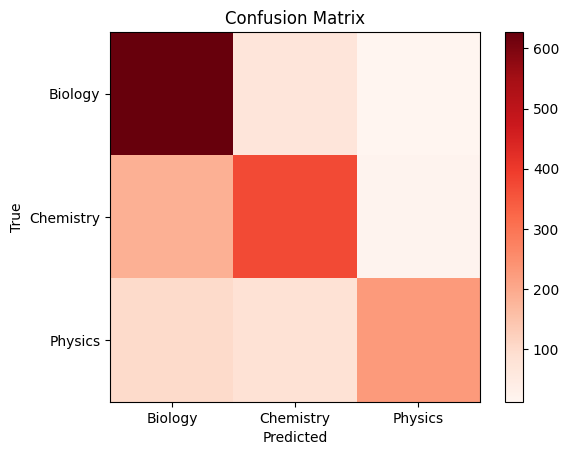

Accuracy: 0.7224513847967
Precision: 0.7400714682732534
Recall: 0.7224513847967
F1 score:  0.7168511606648721
-------------------------
Confusion matrix:
[[627  70  13]
 [187 371  19]
 [100  82 228]]


In [236]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
plot_matrix(cm, 'Reds')
print_data(y_val, y_pred, cm)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


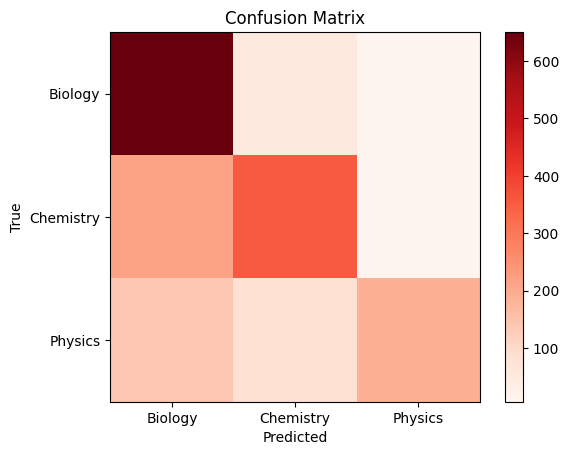

Accuracy: 0.7024160282852092
Precision: 0.7400283723594945
Recall: 0.7024160282852092
F1 score:  0.69110836928572
-------------------------
Confusion matrix:
[[650  53   7]
 [215 354   8]
 [138  84 188]]


In [237]:
nb1 = MultinomialNB(alpha=2.0)
nb1.fit(X_train, y_train)
y_pred = nb1.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
plot_matrix(cm, 'Reds')
print_data(y_val, y_pred, cm)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


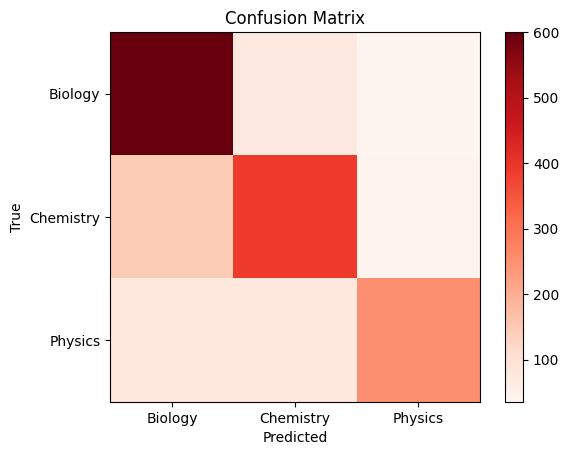

Accuracy: 0.7324690630524455
Precision: 0.7339719431169807
Recall: 0.7324690630524455
F1 score:  0.7293090387780496
-------------------------
Confusion matrix:
[[600  74  36]
 [146 389  42]
 [ 78  78 254]]


In [238]:
nb2 = MultinomialNB(alpha=0.1)
nb2.fit(X_train, y_train)
y_pred = nb2.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
plot_matrix(cm, 'Reds')
print_data(y_val, y_pred, cm)

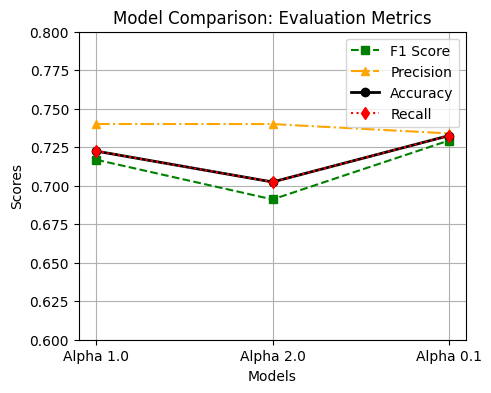

In [244]:
model_names = ['Alpha 1.0', 'Alpha 2.0', 'Alpha 0.1']
plt.figure(figsize=(5, 4))
plt.plot(model_names, f1_scores, marker='s', linestyle='--', color='green', label='F1 Score')
plt.plot(model_names, precision_scores, marker='^', linestyle='-.', color='orange', label='Precision')
plt.plot(model_names, accuracy_scores, marker='o', linestyle='-', linewidth=2, color='black', label='Accuracy')
plt.plot(model_names, recall_scores, marker='d', linestyle=':', color='red', label='Recall')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison: Evaluation Metrics')
plt.ylim(0.6, 0.8) 
plt.legend()
plt.grid(True)
plt.show()